# Comparison Loss Function and Validation Score

1) Import der einzelnen Libraries. Sortieren der Daten nach der Zielkategorie für den ersten Überblick.
2) Aufteilen der Trainings- und Testdaten. Erstellen von notwendigen Listen
3) Erstellen von Funktionen 
4) initialisieren der einzelnen MLPClassifier Netze 
5) Ergebnisse: Textuelle Daten, geplottete Vergleiche, prozentuale Heatmaps und Reports

## imports and data

In [62]:
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, balanced_accuracy_score, roc_auc_score, top_k_accuracy_score, cohen_kappa_score, matthews_corrcoef, hinge_loss
from sklearn.metrics import plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import RocCurveDisplay, accuracy_score, recall_score, precision_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pandas as pd
import time
covertype = fetch_covtype()
forest = fetch_covtype(as_frame=True)
covertype.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [63]:
forest.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [64]:
forestlist = forest.frame
forestlistFiltered = forestlist.filter(items=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Cover_Type'])

In [65]:
forestlist = forest.frame
forestlistSorted = forestlist.sort_values(by='Cover_Type')
forestlistSorted

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
290505,2928.0,58.0,7.0,150.0,-7.0,1836.0,226.0,225.0,133.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532739,3015.0,343.0,18.0,376.0,50.0,3378.0,181.0,211.0,166.0,1982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532740,3018.0,341.0,18.0,350.0,53.0,3398.0,180.0,211.0,168.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532741,3021.0,345.0,18.0,324.0,45.0,3419.0,182.0,209.0,164.0,2029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532742,3023.0,349.0,19.0,300.0,47.0,3439.0,182.0,206.0,160.0,2052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399826,3334.0,356.0,10.0,558.0,100.0,765.0,204.0,223.0,156.0,1642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399825,3333.0,6.0,7.0,601.0,99.0,806.0,212.0,226.0,152.0,1583.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399824,3334.0,3.0,5.0,601.0,39.0,845.0,214.0,231.0,155.0,1524.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399812,3331.0,246.0,3.0,660.0,117.0,859.0,213.0,241.0,166.0,1113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


## training and test data

In [66]:
covertype['data'].shape

(581012, 54)

In [67]:
X_c = covertype['data']
y_c = covertype['target']

In [68]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c)
print(X_train_c.shape) 
print(X_test_c.shape)

(435759, 54)
(145253, 54)


In [69]:
scaler_c = StandardScaler()
# Fit only to the training data
scaler_c.fit(X_train_c)

StandardScaler()

In [70]:
X_train_c = scaler_c.transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

In [71]:
classificationList = []
curve = []
validation = []
iteration = []

accuracyList = []
recallList = []
precisionList = []
timeList = []

## functions

In [72]:
def plotData():
    fig, axes = plt.subplots(3,2)
    sns.histplot(data=forestlistSorted, x="Elevation", color="skyblue", label="Elevation", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Aspect", color="red", label="Aspect", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Slope", color="orange", label="Slope", kde=True, ax=axes[0,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Hydrology", color="skyblue", label="Horizontal_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Vertical_Distance_To_Hydrology", color="red", label="Vertical_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Roadways", color="orange", label="Horizontal_Distance_To_Roadways", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Fire_Points", color="green", label="Horizontal_Distance_To_Fire_Points", kde=True, ax=axes[0,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Hillshade_9am", color="skyblue", label="Hillshade_9am", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_Noon", color="red", label="Hillshade_Noon", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_3pm", color="orange", label="Hillshade_3pm", kde=True, ax=axes[1,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Soil_Type_31", color="skyblue", label="Soil_Type_31", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_32", color="red", label="Soil_Type_32", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_33", color="orange", label="Soil_Type_33", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_34", color="cyan", label="Soil_Type_34", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_35", color="darkgreen", label="Soil_Type_35", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_36", color="gold", label="Soil_Type_36", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_37", color="purple", label="Soil_Type_37", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_38", color="silver", label="Soil_Type_38", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_39", color="navy", label="Soil_Type_39", kde=True, ax=axes[1,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Cover_Type", color="orange", label="Cover_Type",  ax=axes[2,1], discrete=True, kde=False)
    plt.legend() 
    fig.tight_layout()

In [73]:
def addToList(mlp, liste):
    liste.append(mlp)

In [74]:
def removeFromList(mlp, liste):
    liste.remove(mlp)

In [75]:
def fitWithTime(mpl):
    begin = time.time()
    mlptrain = mpl.fit(X_train_c,y_train_c)
    end = time.time()
    timestamp = end-begin
    timeList.append(timestamp)
    addToList(mlptrain, classificationList)
    print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))

In [76]:
def comparison(List):
    for mlp in List:
        print(mlp)
        print('\nparamters: ' + str(mlp.get_params(deep=True)))
        print('\nlast loss: ' + str(mlp.loss_))
        print('\nnumber of features seen during fit: ' + str(mlp.n_features_in_))
        print('\nnumber of layers: ' + str(mlp.n_layers_))
        print('\nnumber of outputs: ' + str(mlp.n_outputs_))
        print('\nname of output activation function: ' + str(mlp.out_activation_) )
        print('\nnumber of iterations: ' +str(mlp.n_iter_) )
        print('\nnumber training samples seen by the solver during fitting: ' +str(mlp.t_) )
        print('****************************************************************************************')

In [77]:
def curveValidateIteration(List, c, v, i):
    for mlp in List:
        c.append(mlp.loss_curve_)
        v.append(mlp.validation_scores_)
        i.append(np.arange(1, mlp.n_iter_+1))

__________________________________________________________________________________________________________________________________

In [78]:
cmap = ListedColormap(["coral", "azure", "indigo", "darkgreen", "lightblue", "crimson", "gold", "silver", "teal"])
def plotCurvePerInteration(List, curvy, iterate):
    print('default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE')
    print('Alle Infos, die davon abweichen, werden in der Legende gelistet')
    print('****************************************************************************************')
    for i,c,cl in zip(iterate, curvy, List):
        plt.scatter(i,c, marker = '.', label = str(cl))
    plt.title('Losscurve per iteration')
    plt.xlabel("iteration")
    plt.ylabel("loss curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [79]:
def plotValidationPerInteration(List, validate, iterate):
    for i,v, cl in zip(iterate, validate, List):
        plt.scatter(i,v, marker = '.', label = str(cl))
    plt.title('Validation per iteration')
    plt.xlabel("iteration")
    plt.ylabel("validation")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [80]:
def plotValidationPercurve(List, validate, curvy):
    for c,v,cl in zip(validate, curvy, List):
        plt.scatter(c,v, marker = '.', label = str(cl))
    plt.title('Validation per curve')
    plt.xlabel("validation")
    plt.ylabel("curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()


__________________________________________________________________________________________________________________________________

In [81]:
def heatmaping(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)   
        con_ma = confusion_matrix(y_test_c,predictions)
        con_ma_perc = np.empty([7, 7], dtype=float)

        for i in range(0, 7):
            number = 0.0
            for j in range(0, 7):
                number += con_ma[i][j]
            for j in range(0, 7):
                con_ma_perc[i][j] = 100/number*con_ma[i][j]

        tree = ['Spruce', 'Lodgepole Pine', 'PoderosaPine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

        # ======== Plot confuse matrix prozentual ========

        ay = sns.heatmap(con_ma_perc, annot=True, cmap='coolwarm', yticklabels=tree, xticklabels=tree, fmt='.2f', vmin=0, vmax=100)
        ay.xaxis.tick_top()
        ay.xaxis.set_label_position('top')
        plt.xticks(rotation=90)
        ay.set(title="Confusion Matrix - Recall",
              xlabel="- Predicted Tree -",
              ylabel="- Actual Tree -")
        plt.show()

In [82]:
def reporting(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)
        print(classification_report(y_test_c,predictions))

In [83]:
def accuracyPlotting(List):
        for mlp in List:
            print(mlp)
            predictions = mlp.predict(X_test_c)
            accuracy = accuracy_score(y_test_c, predictions)
            recall = recall_score(y_test_c, predictions, average = 'weighted')
            precision = precision_score(y_test_c, predictions, average = 'weighted')
            
            addToList(accuracy, accuracyList)
            addToList(recall, recallList)
            addToList(precision, precisionList)
            
            print('Accuracy: \t{0:.2f}'.format(accuracy * 100.0))
            print('Recall: \t{0:.2f}'.format(recall * 100.0))
            print('precision: \t{0:.2f}'.format(precision * 100.0))

In [84]:
def getTimeofMLP(List):
    for mlp, t in zip(List,timeList):
        print(mlp,t/60)

## initializing nets

## Hidden Layer (60,60,60,60)

### Learningrate = invscaling
<li>invscaling: $effectiveLearningRate = \frac{learningRateInit}{t^power_t}$ </li>

### Solver = Adam
<p> Kombination aus zwei Erweiterungen </p>
<li> Adaptive Gradient Algorithm </li>
<li> Root Mean Square Propagation </li>

#### Parameter
<li> alpha: Schrittgröße/Lernrate </li>
<li> beta1: Exponetielle Zerfallsrate des ersten Impulses </li>
<li> beta2: Exponetielle Zerfallsrate des zweiten Impulses </li>
<li> epsilon: Um nicht durch 0 zu teilen </li>

### tanh
<li> hyperbolic Tangens Function </li>
<li> Berechnung: $f(x) = tanh(x)$ </li>

In [85]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(60,60,60,60),  max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'tanh')
begin = time.time()
mlp_1_train = mlp_1.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_1_train, classificationList)

Iteration 1, loss = 0.58077502
Validation score: 0.786213
Iteration 2, loss = 0.45111005
Validation score: 0.824995
Iteration 3, loss = 0.39014750
Validation score: 0.847439
Iteration 4, loss = 0.34953641
Validation score: 0.862539
Iteration 5, loss = 0.32123360
Validation score: 0.872109
Iteration 6, loss = 0.29961923
Validation score: 0.881793
Iteration 7, loss = 0.28187795
Validation score: 0.885740
Iteration 8, loss = 0.26832023
Validation score: 0.893198
Iteration 9, loss = 0.25615100
Validation score: 0.896044
Iteration 10, loss = 0.24566465
Validation score: 0.900679
Iteration 11, loss = 0.23727628
Validation score: 0.903915
Iteration 12, loss = 0.22919682
Validation score: 0.908803
Iteration 13, loss = 0.22229071
Validation score: 0.905613
Iteration 14, loss = 0.21577812
Validation score: 0.908619
Iteration 15, loss = 0.21035584
Validation score: 0.912337
Iteration 16, loss = 0.20531965
Validation score: 0.913209
Iteration 17, loss = 0.20056581
Validation score: 0.915183
Iterat

### Gradient Descent (SDG)
$\lambda_{t+1} = \lambda _t - \eta\nabla l(\lambda)$

### adaptive
</li> constant, solange learningrate fällt. </li>
</li> Wenn learningrate zweimal nicht fällt um tol, dann  $\frac{learningrate}{5}$</li>

### tanh
<li> hyperbolic Tangens Function </li>
<li> Berechnung: $f(x) = tanh(x)$ </li>

In [99]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(60,60,60,60), max_iter = 350, early_stopping = True, verbose = True, learning_rate = "adaptive", solver = "sgd", activation = 'tanh')
begin = time.time()
mlp_2_train = mlp_2.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_2_train, classificationList)

Iteration 1, loss = 0.75513098
Validation score: 0.721934
Iteration 2, loss = 0.64556166
Validation score: 0.730723
Iteration 3, loss = 0.61530619
Validation score: 0.739260
Iteration 4, loss = 0.59341487
Validation score: 0.748531
Iteration 5, loss = 0.57647732
Validation score: 0.753970
Iteration 6, loss = 0.56210968
Validation score: 0.759684
Iteration 7, loss = 0.54945877
Validation score: 0.766179
Iteration 8, loss = 0.53761555
Validation score: 0.770814
Iteration 9, loss = 0.52643052
Validation score: 0.774784
Iteration 10, loss = 0.51590836
Validation score: 0.779190
Iteration 11, loss = 0.50606789
Validation score: 0.783252
Iteration 12, loss = 0.49690795
Validation score: 0.788921
Iteration 13, loss = 0.48821573
Validation score: 0.792982
Iteration 14, loss = 0.48022845
Validation score: 0.795094
Iteration 15, loss = 0.47266571
Validation score: 0.800670
Iteration 16, loss = 0.46539281
Validation score: 0.802713
Iteration 17, loss = 0.45862850
Validation score: 0.804916
Iterat

## Hidden Layer (70,70,70)

In [87]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(70,70,70),  max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'tanh')
begin = time.time()
mlp_3_train = mlp_3.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_3_train, classificationList)

Iteration 1, loss = 0.58769759
Validation score: 0.785822
Iteration 2, loss = 0.46017265
Validation score: 0.815793
Iteration 3, loss = 0.39690872
Validation score: 0.843951
Iteration 4, loss = 0.35427751
Validation score: 0.861093
Iteration 5, loss = 0.32468183
Validation score: 0.867955
Iteration 6, loss = 0.30267325
Validation score: 0.878465
Iteration 7, loss = 0.28498907
Validation score: 0.883835
Iteration 8, loss = 0.27024560
Validation score: 0.889251
Iteration 9, loss = 0.25740783
Validation score: 0.892556
Iteration 10, loss = 0.24739487
Validation score: 0.898522
Iteration 11, loss = 0.23795566
Validation score: 0.898912
Iteration 12, loss = 0.23040203
Validation score: 0.903204
Iteration 13, loss = 0.22342350
Validation score: 0.906898
Iteration 14, loss = 0.21731492
Validation score: 0.908069
Iteration 15, loss = 0.21146009
Validation score: 0.913966
Iteration 16, loss = 0.20641990
Validation score: 0.911672
Iteration 17, loss = 0.20274005
Validation score: 0.914288
Iterat

In [100]:
mlp_4 = MLPClassifier(hidden_layer_sizes=(70,70,70), max_iter = 350, early_stopping = True, verbose = True, learning_rate = "adaptive", solver = "sgd", activation = 'tanh')
begin = time.time()
mlp_4_train = mlp_4.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_4_train, classificationList)

Iteration 1, loss = 0.78400909
Validation score: 0.719272
Iteration 2, loss = 0.66254908
Validation score: 0.730953
Iteration 3, loss = 0.63439074
Validation score: 0.737814
Iteration 4, loss = 0.61361277
Validation score: 0.743689
Iteration 5, loss = 0.59620217
Validation score: 0.751354
Iteration 6, loss = 0.58113519
Validation score: 0.758216
Iteration 7, loss = 0.56768933
Validation score: 0.763241
Iteration 8, loss = 0.55549769
Validation score: 0.767464
Iteration 9, loss = 0.54410800
Validation score: 0.770677
Iteration 10, loss = 0.53359266
Validation score: 0.774761
Iteration 11, loss = 0.52384320
Validation score: 0.779695
Iteration 12, loss = 0.51468753
Validation score: 0.784216
Iteration 13, loss = 0.50626955
Validation score: 0.787589
Iteration 14, loss = 0.49824199
Validation score: 0.791674
Iteration 15, loss = 0.49057588
Validation score: 0.793717
Iteration 16, loss = 0.48368752
Validation score: 0.795644
Iteration 17, loss = 0.47702564
Validation score: 0.799890
Iterat

/opt/jupyterhub/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
getTimeofMLP(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
              max_iter=350, verbose=True) 70.35408772627513
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True) 129.37972022294997
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True) 53.36378928820292
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True) 98.0167611002922


In [102]:
classificationList

[MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
               max_iter=350, verbose=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
               max_iter=350, verbose=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(60, 60, 60, 60), learning_rate='adaptive',
               max_iter=350, solver='sgd', verbose=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(70, 70, 70), learning_rate='adaptive',
               max_iter=350, solver='sgd', verbose=True)]

__________________________________________________________________________________________________________________________________

## Results

In [103]:
comparison(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
              max_iter=350, verbose=True)

paramters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (60, 60, 60, 60), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 350, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}

last loss: 1.331442921999546e-01

number of features seen during fit: 54

number of layers: 6

number of outputs: 7

name of output activation function: softmax

number of iterations: 85

number training samples seen by the solver during fitting: 33335555
**************************************************************

default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE
Alle Infos, die davon abweichen, werden in der Legende gelistet
****************************************************************************************


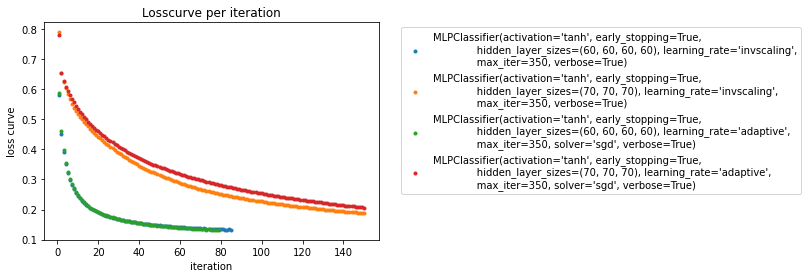

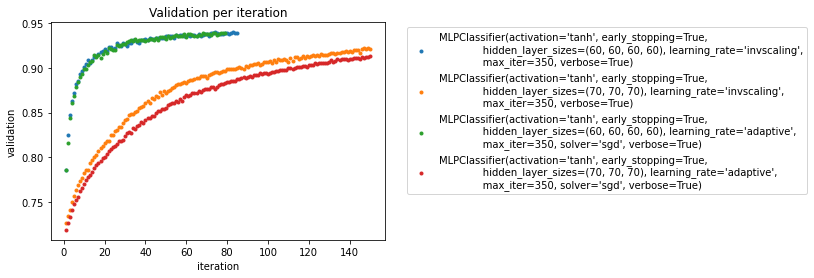

In [104]:
curveValidateIteration(classificationList, curve, validation, iteration)
plotCurvePerInteration(classificationList, curve, iteration)
plotValidationPerInteration(classificationList, validation, iteration)

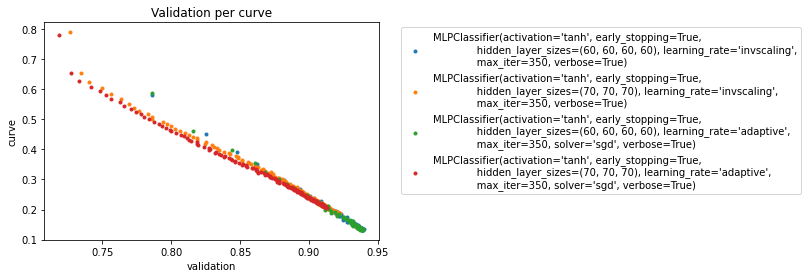

In [105]:
plotValidationPercurve(classificationList, validation, curve)

## Heatmaps

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
              max_iter=350, verbose=True)


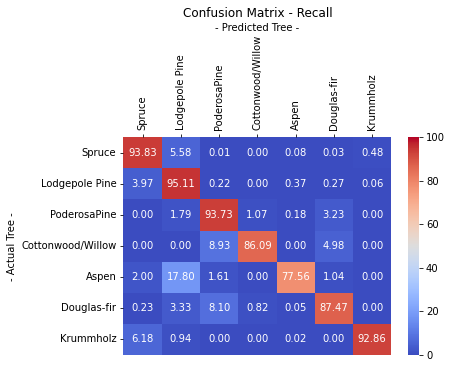

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)


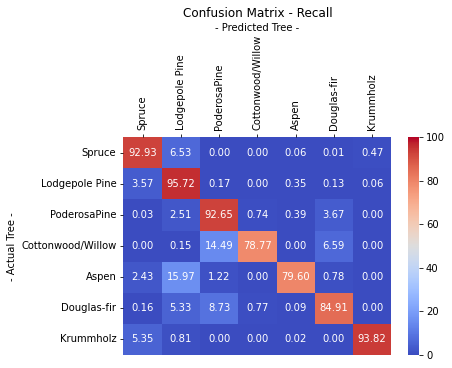

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True)


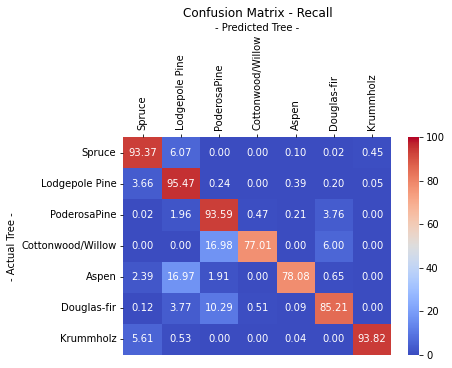

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True)


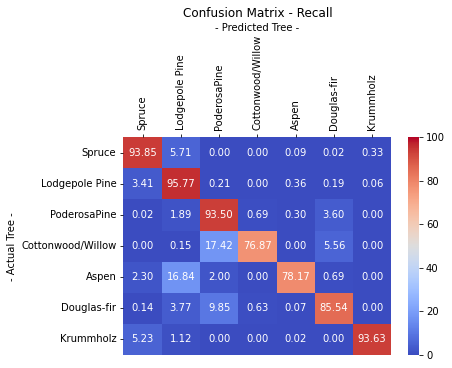

In [106]:
heatmaping(classificationList)

In [107]:
reporting(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
              max_iter=350, verbose=True)
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52812
           2       0.95      0.95      0.95     71078
           3       0.93      0.94      0.94      8998
           4       0.82      0.86      0.84       683
           5       0.85      0.78      0.81      2304
           6       0.87      0.87      0.87      4294
           7       0.94      0.93      0.93      5084

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)
              precision    recall  f1-score   support

  

In [108]:
accuracyPlotting(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	93.93
Recall: 	93.93
precision: 	93.92
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	93.79
Recall: 	93.79
precision: 	93.78
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60, 60), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True)
Accuracy: 	93.87
Recall: 	93.87
precision: 	93.85
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), learning_rate='adaptive',
              max_iter=350, solver='sgd', verbose=True)
Accuracy: 	94.19
Recall: 	94.19
precision: 	94.17


## Fazit
<li> </li>
<li>  </li>
<li>  </li>